## メモ
- もしかしたら、matplotlibで日本語表示するときに変になるかも
    - https://datumstudio.jp/blog/matplotlib%E3%81%AE%E6%97%A5%E6%9C%AC%E8%AA%9E%E6%96%87%E5%AD%97%E5%8C%96%E3%81%91%E3%82%92%E8%A7%A3%E6%B6%88%E3%81%99%E3%82%8Bwindows%E7%B7%A8

In [1]:
import networkx as nx

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### クラスタリング（コミュニティ検出）

- モジュラリティクラスタリング
- 北海道、四国、九州、沖縄に関しては、距離的に近い県とつながるとしている(1つは限らない), prefectures_in_Japan.txtを参照

['北海道', '青森県', '岩手県', '宮城県', '山形県', '秋田県', '福島県', '茨城県', '千葉県', '栃木県', '埼玉県', '群馬県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '京都府', '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '大阪府', '奈良県', '兵庫県', '和歌山県', '鳥取県', '島根県', '広島県', '岡山県', '山口県', '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県']


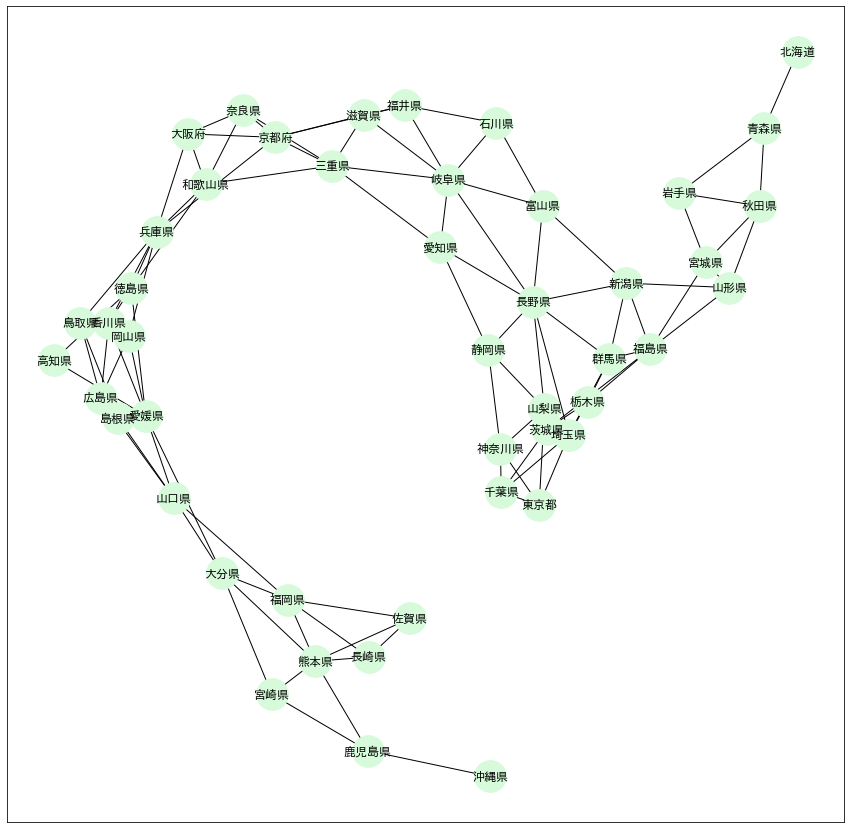

In [3]:
G = nx.read_edgelist('./input/prefectures/prefectures_edgelist.csv', delimiter=',', nodetype=str, encoding='UTF-8', create_using=nx.Graph())
print(G.nodes())


plt.figure(figsize=(15,15))
pos=nx.spring_layout(G, k=0.3, seed=67)  # バネモデルで可視化, kはノード間の反発力を調整, 大きいほど離れる
nx.draw_networkx(G, pos, node_size=1000, node_color='#d6fada', font_family='IPAexGothic', random_state=42)
plt.show()

In [4]:
# モジュラリティクラスタリング
# 無向、重みなしグラフ
from networkx.algorithms.community import greedy_modularity_communities

community = greedy_modularity_communities(G)
community

[frozenset({'北海道',
            '千葉県',
            '埼玉県',
            '宮城県',
            '山形県',
            '山梨県',
            '岩手県',
            '新潟県',
            '東京都',
            '栃木県',
            '神奈川県',
            '福島県',
            '秋田県',
            '群馬県',
            '茨城県',
            '長野県',
            '青森県',
            '静岡県'}),
 frozenset({'三重県',
            '京都府',
            '和歌山県',
            '大阪府',
            '奈良県',
            '富山県',
            '岐阜県',
            '愛知県',
            '滋賀県',
            '石川県',
            '福井県'}),
 frozenset({'兵庫県', '岡山県', '島根県', '広島県', '徳島県', '愛媛県', '香川県', '高知県', '鳥取県'}),
 frozenset({'佐賀県', '大分県', '宮崎県', '山口県', '沖縄県', '熊本県', '福岡県', '長崎県', '鹿児島県'})]

In [5]:
colors = ['red', 'blue', 'green','purple']
cmap_commnity = {}
counter = 0
for c in community:
    for n in c:
        cmap_commnity[n] = colors[counter]
    counter+=1

cmap_commnity = {n: cmap_commnity[n] for n in list(G.nodes)}  # keyをGに格納されているノードの順序に並び替え
cmap_commnity

{'北海道': 'red',
 '青森県': 'red',
 '岩手県': 'red',
 '宮城県': 'red',
 '山形県': 'red',
 '秋田県': 'red',
 '福島県': 'red',
 '茨城県': 'red',
 '千葉県': 'red',
 '栃木県': 'red',
 '埼玉県': 'red',
 '群馬県': 'red',
 '東京都': 'red',
 '神奈川県': 'red',
 '新潟県': 'red',
 '富山県': 'blue',
 '石川県': 'blue',
 '福井県': 'blue',
 '京都府': 'blue',
 '山梨県': 'red',
 '長野県': 'red',
 '岐阜県': 'blue',
 '静岡県': 'red',
 '愛知県': 'blue',
 '三重県': 'blue',
 '滋賀県': 'blue',
 '大阪府': 'blue',
 '奈良県': 'blue',
 '兵庫県': 'green',
 '和歌山県': 'blue',
 '鳥取県': 'green',
 '島根県': 'green',
 '広島県': 'green',
 '岡山県': 'green',
 '山口県': 'purple',
 '徳島県': 'green',
 '香川県': 'green',
 '愛媛県': 'green',
 '高知県': 'green',
 '福岡県': 'purple',
 '佐賀県': 'purple',
 '長崎県': 'purple',
 '熊本県': 'purple',
 '大分県': 'purple',
 '宮崎県': 'purple',
 '鹿児島県': 'purple',
 '沖縄県': 'purple'}

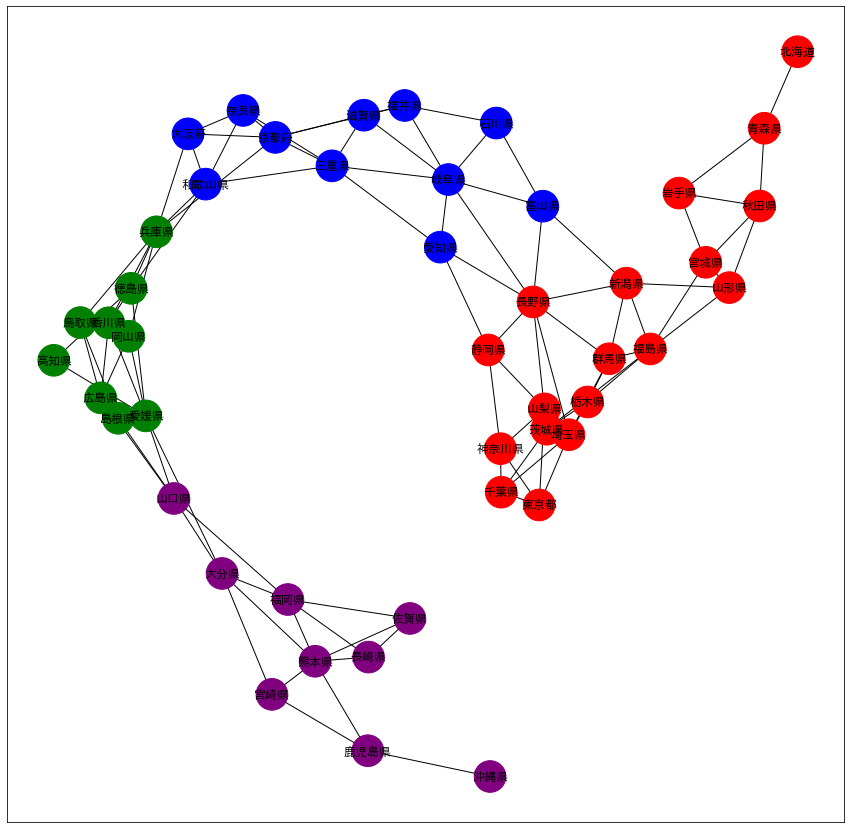

In [6]:
plt.figure(figsize=(15,15))
pos=nx.spring_layout(G, k=0.3, seed=67)  # バネモデルで可視化, kはノード間の反発力を調整, 大きいほど離れる
nx.draw_networkx(G, pos, node_color=cmap_commnity.values(), node_size=1000, font_family='IPAexGothic', random_state=42)
plt.show()

### リンク予測
- 仮に、日本の形状が変化するものとしてみて、その際にどの県とどの県がつながりやすいのか計算してみる

In [7]:
G.number_of_nodes()

47

In [8]:
G.has_edge('北海道', '青森県')

True

In [9]:
list(G.nodes())[0]

'北海道'

In [10]:
len(list(nx.common_neighbors(G, '北海道', '岩手県')))

1

In [11]:
list(nx.jaccard_coefficient(G, [('北海道', '岩手県')]))[0]

('北海道', '岩手県', 0.3333333333333333)

In [12]:
list(nx.jaccard_coefficient(G))

[('三重県', '山口県', 0.0),
 ('三重県', '宮城県', 0.0),
 ('三重県', '福井県', 0.42857142857142855),
 ('三重県', '山梨県', 0.0),
 ('三重県', '群馬県', 0.0),
 ('三重県', '福岡県', 0.0),
 ('三重県', '長野県', 0.16666666666666666),
 ('三重県', '岡山県', 0.0),
 ('三重県', '大阪府', 0.42857142857142855),
 ('三重県', '埼玉県', 0.0),
 ('三重県', '鳥取県', 0.0),
 ('三重県', '静岡県', 0.1111111111111111),
 ('三重県', '岩手県', 0.0),
 ('三重県', '秋田県', 0.0),
 ('三重県', '福島県', 0.0),
 ('三重県', '鹿児島県', 0.0),
 ('三重県', '熊本県', 0.0),
 ('三重県', '長崎県', 0.0),
 ('三重県', '栃木県', 0.0),
 ('三重県', '広島県', 0.0),
 ('三重県', '佐賀県', 0.0),
 ('三重県', '宮崎県', 0.0),
 ('三重県', '大分県', 0.0),
 ('三重県', '山形県', 0.0),
 ('三重県', '高知県', 0.0),
 ('三重県', '兵庫県', 0.18181818181818182),
 ('三重県', '神奈川県', 0.0),
 ('三重県', '島根県', 0.0),
 ('三重県', '茨城県', 0.0),
 ('三重県', '青森県', 0.0),
 ('三重県', '香川県', 0.0),
 ('三重県', '石川県', 0.125),
 ('三重県', '千葉県', 0.0),
 ('三重県', '徳島県', 0.1),
 ('三重県', '東京都', 0.0),
 ('三重県', '北海道', 0.0),
 ('三重県', '新潟県', 0.0),
 ('三重県', '愛媛県', 0.0),
 ('三重県', '富山県', 0.1111111111111111),
 ('三重県', '沖縄県', 0.0),
 ('山口県', '宮城県', 0.0),


In [13]:
print(G.nodes())

['北海道', '青森県', '岩手県', '宮城県', '山形県', '秋田県', '福島県', '茨城県', '千葉県', '栃木県', '埼玉県', '群馬県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '京都府', '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '大阪府', '奈良県', '兵庫県', '和歌山県', '鳥取県', '島根県', '広島県', '岡山県', '山口県', '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県']


In [14]:
# 各リストに、(ノード1, ノード2, 指標値)の要素を格納する
CN = []
JC = []
AA = []
PA = []

num_nodes = G.number_of_nodes()
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        u = list(G.nodes())[i]
        v = list(G.nodes())[j]
        if not G.has_edge(u, v):
            CN.append(tuple([u, v, len(list(nx.common_neighbors(G, u, v)))]))
            JC.append(list(nx.jaccard_coefficient(G, [(u, v)]))[0])
            AA.append(list(nx.adamic_adar_index(G, [(u, v)]))[0])
            PA.append(list(nx.preferential_attachment(G, [(u, v)]))[0])

# 指標が大きい順に並び替え
CN = sorted(CN, key=lambda x: x[2], reverse=True)
JC = sorted(JC, key=lambda x: x[2], reverse=True)
AA = sorted(AA, key=lambda x: x[2], reverse=True)
PA = sorted(PA, key=lambda x: x[2], reverse=True)

In [15]:
CN

[('京都府', '和歌山県', 4),
 ('福島県', '埼玉県', 3),
 ('茨城県', '群馬県', 3),
 ('千葉県', '山梨県', 3),
 ('埼玉県', '神奈川県', 3),
 ('福井県', '三重県', 3),
 ('京都府', '岐阜県', 3),
 ('三重県', '大阪府', 3),
 ('奈良県', '兵庫県', 3),
 ('兵庫県', '広島県', 3),
 ('兵庫県', '愛媛県', 3),
 ('鳥取県', '香川県', 3),
 ('岡山県', '徳島県', 3),
 ('青森県', '宮城県', 2),
 ('岩手県', '山形県', 2),
 ('宮城県', '新潟県', 2),
 ('山形県', '群馬県', 2),
 ('秋田県', '福島県', 2),
 ('福島県', '長野県', 2),
 ('茨城県', '東京都', 2),
 ('千葉県', '栃木県', 2),
 ('栃木県', '新潟県', 2),
 ('栃木県', '長野県', 2),
 ('埼玉県', '新潟県', 2),
 ('埼玉県', '静岡県', 2),
 ('群馬県', '富山県', 2),
 ('群馬県', '山梨県', 2),
 ('東京都', '長野県', 2),
 ('東京都', '静岡県', 2),
 ('神奈川県', '長野県', 2),
 ('新潟県', '岐阜県', 2),
 ('富山県', '福井県', 2),
 ('富山県', '愛知県', 2),
 ('石川県', '長野県', 2),
 ('石川県', '滋賀県', 2),
 ('山梨県', '愛知県', 2),
 ('長野県', '三重県', 2),
 ('岐阜県', '静岡県', 2),
 ('愛知県', '滋賀県', 2),
 ('三重県', '兵庫県', 2),
 ('滋賀県', '奈良県', 2),
 ('大阪府', '徳島県', 2),
 ('和歌山県', '香川県', 2),
 ('鳥取県', '山口県', 2),
 ('鳥取県', '愛媛県', 2),
 ('島根県', '岡山県', 2),
 ('島根県', '愛媛県', 2),
 ('広島県', '徳島県', 2),
 ('広島県', '大分県', 2),
 ('岡山県', '山口県', 

In [16]:
JC

[('京都府', '和歌山県', 0.5714285714285714),
 ('茨城県', '群馬県', 0.5),
 ('千葉県', '山梨県', 0.5),
 ('鳥取県', '香川県', 0.5),
 ('福井県', '三重県', 0.42857142857142855),
 ('三重県', '大阪府', 0.42857142857142855),
 ('岡山県', '徳島県', 0.42857142857142855),
 ('青森県', '宮城県', 0.4),
 ('岩手県', '山形県', 0.4),
 ('石川県', '滋賀県', 0.4),
 ('香川県', '高知県', 0.4),
 ('埼玉県', '神奈川県', 0.375),
 ('奈良県', '兵庫県', 0.375),
 ('北海道', '岩手県', 0.3333333333333333),
 ('茨城県', '東京都', 0.3333333333333333),
 ('千葉県', '栃木県', 0.3333333333333333),
 ('東京都', '静岡県', 0.3333333333333333),
 ('富山県', '福井県', 0.3333333333333333),
 ('富山県', '愛知県', 0.3333333333333333),
 ('愛知県', '滋賀県', 0.3333333333333333),
 ('滋賀県', '奈良県', 0.3333333333333333),
 ('島根県', '岡山県', 0.3333333333333333),
 ('福岡県', '宮崎県', 0.3333333333333333),
 ('佐賀県', '大分県', 0.3333333333333333),
 ('長崎県', '大分県', 0.3333333333333333),
 ('大分県', '鹿児島県', 0.3333333333333333),
 ('宮崎県', '沖縄県', 0.3333333333333333),
 ('福島県', '埼玉県', 0.3),
 ('京都府', '岐阜県', 0.3),
 ('兵庫県', '広島県', 0.3),
 ('宮城県', '新潟県', 0.2857142857142857),
 ('山形県', '群馬県', 0.28571

In [17]:
AA

[('京都府', '和歌山県', 2.5147040098099613),
 ('福島県', '埼玉県', 2.0640299754485754),
 ('埼玉県', '神奈川県', 2.0640299754485754),
 ('京都府', '岐阜県', 2.0008056674402104),
 ('兵庫県', '広島県', 1.9640173895637054),
 ('千葉県', '山梨県', 1.9565933832587141),
 ('奈良県', '兵庫県', 1.9007930815553409),
 ('三重県', '大阪府', 1.9007930815553407),
 ('兵庫県', '愛媛県', 1.8640048036788355),
 ('茨城県', '群馬県', 1.7933564893654796),
 ('福井県', '三重県', 1.7933564893654796),
 ('鳥取県', '香川県', 1.6933439034806097),
 ('岡山県', '徳島県', 1.6491316192991132),
 ('青森県', '宮城県', 1.631586747071319),
 ('鳥取県', '山口県', 1.4683498531780845),
 ('大分県', '鹿児島県', 1.4683498531780845),
 ('岩手県', '山形県', 1.4426950408889634),
 ('秋田県', '福島県', 1.4426950408889634),
 ('富山県', '福井県', 1.424137568996588),
 ('東京都', '静岡県', 1.3426824550040934),
 ('神奈川県', '長野県', 1.3426824550040934),
 ('宮城県', '新潟県', 1.279458146995729),
 ('島根県', '岡山県', 1.279458146995729),
 ('福島県', '長野県', 1.2426698691192237),
 ('山口県', '熊本県', 1.2426698691192237),
 ('愛媛県', '福岡県', 1.2426698691192237),
 ('茨城県', '東京都', 1.2352458628142324),
 

In [18]:
PA

[('長野県', '兵庫県', 56),
 ('長野県', '愛媛県', 56),
 ('埼玉県', '岐阜県', 49),
 ('埼玉県', '兵庫県', 49),
 ('埼玉県', '愛媛県', 49),
 ('岐阜県', '兵庫県', 49),
 ('岐阜県', '愛媛県', 49),
 ('兵庫県', '愛媛県', 49),
 ('福島県', '長野県', 48),
 ('京都府', '長野県', 48),
 ('長野県', '三重県', 48),
 ('長野県', '広島県', 48),
 ('長野県', '熊本県', 48),
 ('福島県', '埼玉県', 42),
 ('福島県', '岐阜県', 42),
 ('福島県', '兵庫県', 42),
 ('福島県', '愛媛県', 42),
 ('埼玉県', '京都府', 42),
 ('埼玉県', '三重県', 42),
 ('埼玉県', '広島県', 42),
 ('埼玉県', '熊本県', 42),
 ('京都府', '岐阜県', 42),
 ('京都府', '愛媛県', 42),
 ('岐阜県', '広島県', 42),
 ('岐阜県', '熊本県', 42),
 ('三重県', '兵庫県', 42),
 ('三重県', '愛媛県', 42),
 ('兵庫県', '広島県', 42),
 ('兵庫県', '熊本県', 42),
 ('愛媛県', '熊本県', 42),
 ('長野県', '和歌山県', 40),
 ('長野県', '岡山県', 40),
 ('長野県', '山口県', 40),
 ('長野県', '徳島県', 40),
 ('長野県', '香川県', 40),
 ('長野県', '福岡県', 40),
 ('長野県', '大分県', 40),
 ('福島県', '京都府', 36),
 ('福島県', '三重県', 36),
 ('福島県', '広島県', 36),
 ('福島県', '熊本県', 36),
 ('京都府', '広島県', 36),
 ('京都府', '熊本県', 36),
 ('三重県', '広島県', 36),
 ('三重県', '熊本県', 36),
 ('広島県', '熊本県', 36),
 ('埼玉県', '新潟県', 35),
 ('埼玉県', '和歌

### ラベル伝搬
- 各都道府県に、ラベルとして地方名を与える（8地方）

- ここでは、local_and_global_consistencyを用いる

In [19]:
df = pd.read_csv('./input/prefectures/prefectures_area.csv') 
df

,prefecture,area
0,北海道,北海道地方
1,青森県,東北地方
2,岩手県,東北地方
3,宮城県,東北地方
4,秋田県,東北地方
5,山形県,東北地方
6,福島県,東北地方
7,茨城県,関東地方
8,栃木県,関東地方
9,群馬県,関東地方


In [20]:
G.node['北海道']

{}

In [21]:
targets = ['新潟県', '東京都', '福岡県']
for n in list(G.nodes()):
    if n not in targets:
        G.node[n]['label'] = df.loc[df.prefecture==n, 'area'].values[0]

In [22]:
G.node['北海道']

{'label': '北海道地方'}

In [23]:
for t in targets:
    print(G.node[t])

{}
{}
{}


In [24]:
from networkx.algorithms import node_classification

pred = node_classification.local_and_global_consistency(G, alpha=0.99) 

for n, p in zip(list(G.nodes()), pred):
    G.node[n]['pred'] = p

In [25]:
for t in targets:
    print('%s'%t, G.node[t])

新潟県 {'pred': '中部地方'}
東京都 {'pred': '関東地方'}
福岡県 {'pred': '九州地方'}


### 重要度計算

### ページランク
- 有向グラフの場合の方が好ましいが、ここでは無向グラフでやる

- 熊本は九州の中心らしい

In [26]:
pagerank = nx.pagerank(G)
print('PageRank： {}'.format(pagerank))

PageRank： {'北海道': 0.009290120130232123, '青森県': 0.02152260339872337, '岩手県': 0.019008403534726336, '宮城県': 0.021976893178181967, '山形県': 0.020733022018973975, '秋田県': 0.023752706013828995, '福島県': 0.027849135400729294, '茨城県': 0.018749812913893067, '千葉県': 0.018815988478959943, '栃木県': 0.018564807506132538, '埼玉県': 0.030220740022546107, '群馬県': 0.022200088927361507, '東京都': 0.018657572400396064, '神奈川県': 0.018852102229717158, '新潟県': 0.02281074146912772, '富山県': 0.01846217710817628, '石川県': 0.014707114181632716, '福井県': 0.018529200055932993, '京都府': 0.02590141024541701, '山梨県': 0.022307847340357664, '長野県': 0.03360776061303948, '岐阜県': 0.030103258559160035, '静岡県': 0.018379185249166822, '愛知県': 0.017971474098840146, '三重県': 0.025755893513077707, '滋賀県': 0.018101745494418023, '大阪府': 0.018038995883509514, '奈良県': 0.01807612089818644, '兵庫県': 0.02967754994113902, '和歌山県': 0.021964453859305663, '鳥取県': 0.018522106319933864, '島根県': 0.01489395003669385, '広島県': 0.026590694760318036, '岡山県': 0.022001497797988056, '山口県': 0.

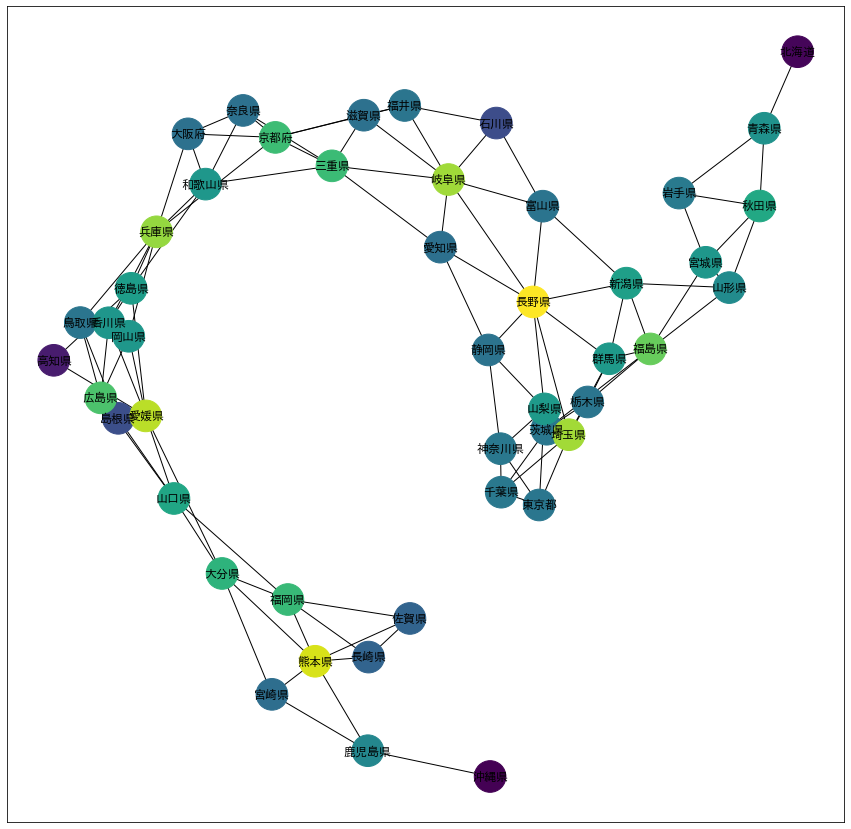

In [27]:
# PageRankの大きさに応じて，　ノードの色を変えたグラフ
plt.figure(figsize=(15,15))
pos=nx.spring_layout(G, k=0.3, seed=67)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=list(pagerank.values()), cmap=plt.cm.viridis)
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', random_state=42)
plt.show()

### 近接中心性
- 他の全てのノードとの距離の近さを示す指標, つまりグラフ上の中心にあるものが高くなる

In [28]:
# 近接中心性
closeness_cen = nx.closeness_centrality(G)
print('近接中心性： {}'.format(closeness_cen))

近接中心性： {'北海道': 0.1295774647887324, '青森県': 0.14838709677419354, '岩手県': 0.152317880794702, '宮城県': 0.17557251908396945, '山形県': 0.2, '秋田県': 0.17164179104477612, '福島県': 0.20353982300884957, '茨城県': 0.19913419913419914, '千葉県': 0.1940928270042194, '栃木県': 0.19827586206896552, '埼玉県': 0.22549019607843138, '群馬県': 0.22885572139303484, '東京都': 0.1885245901639344, '神奈川県': 0.2072072072072072, '新潟県': 0.23115577889447236, '富山県': 0.25274725274725274, '石川県': 0.24083769633507854, '福井県': 0.25842696629213485, '京都府': 0.26285714285714284, '山梨県': 0.22009569377990432, '長野県': 0.2658959537572254, '岐阜県': 0.2804878048780488, '静岡県': 0.24338624338624337, '愛知県': 0.27710843373493976, '三重県': 0.2857142857142857, '滋賀県': 0.2598870056497175, '大阪府': 0.23115577889447236, '奈良県': 0.25136612021857924, '兵庫県': 0.25136612021857924, '和歌山県': 0.2754491017964072, '鳥取県': 0.22009569377990432, '島根県': 0.19827586206896552, '広島県': 0.2026431718061674, '岡山県': 0.22772277227722773, '山口県': 0.20175438596491227, '徳島県': 0.25555555555555554, '香川県': 0.2

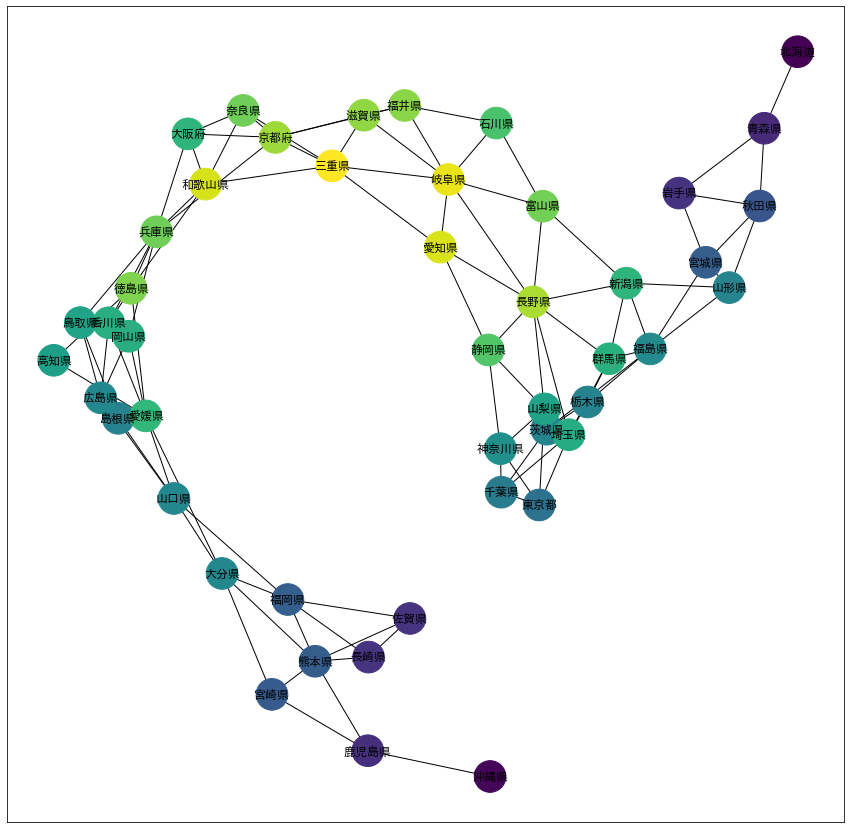

In [29]:
# 近接中心性の大きさに応じて，ノードの色を変えたグラフ
plt.figure(figsize=(15,15))
pos=nx.spring_layout(G, k=0.3, seed=67)
nx.draw_networkx_edges(G, pos, random_state=888)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=list(closeness_cen.values()), cmap=plt.cm.viridis, random_state=888)
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', random_state=42)
plt.show()

### 媒介中心性
- そこを通過しないと, ハブ的な役割のものが高くなる

In [30]:
# 媒介中心性
betweeness_cen = nx.betweenness_centrality(G)
print('媒介中心性： {}'.format(betweeness_cen))

媒介中心性： {'北海道': 0.0, '青森県': 0.0434782608695652, '岩手県': 0.005454545454545454, '宮城県': 0.043481342057194464, '山形県': 0.13648883591684124, '秋田県': 0.08692196638959228, '福島県': 0.07258251945886195, '茨城県': 0.01794299098646925, '千葉県': 0.009057657318526884, '栃木県': 0.004167137210615472, '埼玉県': 0.09212748604052952, '群馬県': 0.04418042029557816, '東京都': 0.0010789049919484703, '神奈川県': 0.012980529937051679, '新潟県': 0.199529661892765, '富山県': 0.08471695549529358, '石川県': 0.009390718283951922, '福井県': 0.04712056292249281, '京都府': 0.14257485673138082, '山梨県': 0.021401384444862705, '長野県': 0.3383839291273302, '岐阜県': 0.27558193444115864, '静岡県': 0.050147855365246664, '愛知県': 0.19059900589002643, '三重県': 0.403875150294959, '滋賀県': 0.023883513835688337, '大阪府': 0.0021958717610891525, '奈良県': 0.005725383580456043, '兵庫県': 0.1809707337760544, '和歌山県': 0.33259567536668744, '鳥取県': 0.042121677124416855, '島根県': 0.005433278476756738, '広島県': 0.01729822512431208, '岡山県': 0.026862170125779423, '山口県': 0.0639105660844791, '徳島県': 0.29285843

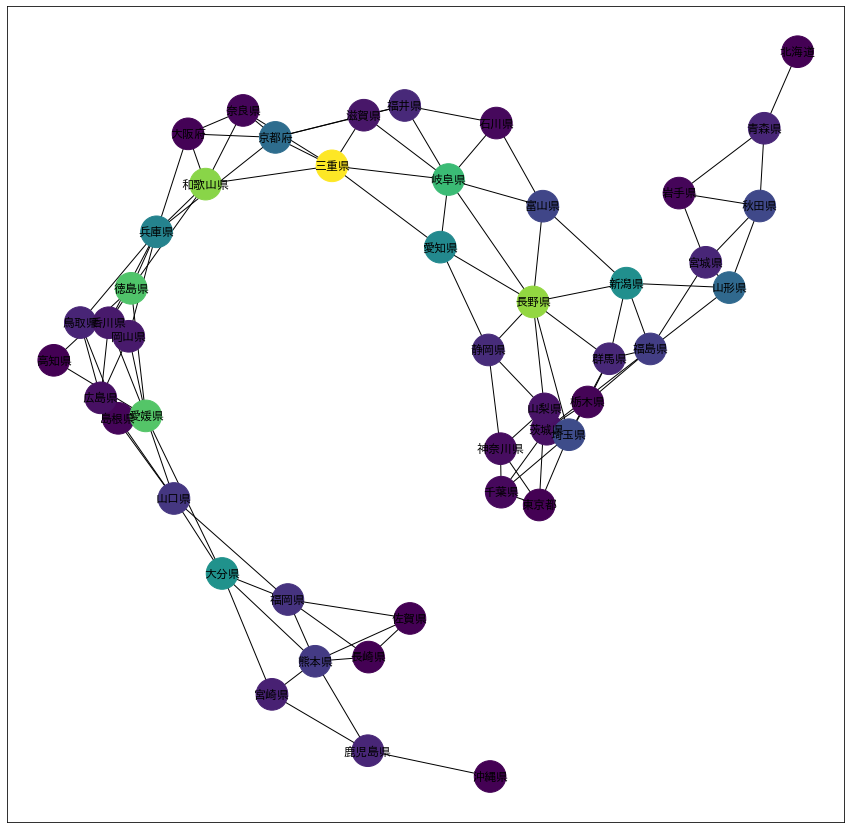

In [31]:
# 媒介中心性の大きさに応じて，　ノードの色を変えたグラフ
plt.figure(figsize=(15,15))
pos=nx.spring_layout(G, k=0.3, seed=67) 
nx.draw_networkx_edges(G, pos, random_state=888)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=list(betweeness_cen.values()), cmap=plt.cm.viridis, random_state=888)
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', random_state=42)
plt.show()

## Graph Embedding
- tutorialを参照
- ただし、大規模グラフの場合、ランダムウォーク部分は処理時間が膨大にかかってしまう
    - --> Stanford universityのC++実装を使うのがおすすめ

In [32]:
import random
random.seed(0)

def make_random_walks(G, num_of_walk, length_of_walk):
    """
    # num_of_walkは、1つのノードに対してランダムウォークを生成する回数
    # length_of_walkは、1つのランダムウォークの長さ
    """
    walks = list()
    for i in range(num_of_walk):
        node_list = list(G.nodes())
        for node in node_list:
            now_node = node
            walk = list()
            walk.append(str(node))
            for j in range(length_of_walk):
                next_node = random.choice(list(G.neighbors(now_node)))
                walk.append(str(next_node))
                now_node = next_node
            walks.append(walk)
    return walks

In [33]:
walks = make_random_walks(G, num_of_walk=2, length_of_walk=5)
walks

[['北海道', '青森県', '岩手県', '青森県', '岩手県', '宮城県'],
 ['青森県', '岩手県', '秋田県', '山形県', '秋田県', '山形県'],
 ['岩手県', '宮城県', '福島県', '栃木県', '茨城県', '栃木県'],
 ['宮城県', '福島県', '宮城県', '岩手県', '宮城県', '福島県'],
 ['山形県', '福島県', '宮城県', '山形県', '福島県', '茨城県'],
 ['秋田県', '青森県', '岩手県', '秋田県', '山形県', '新潟県'],
 ['福島県', '栃木県', '福島県', '茨城県', '栃木県', '埼玉県'],
 ['茨城県', '千葉県', '茨城県', '福島県', '群馬県', '埼玉県'],
 ['千葉県', '神奈川県', '静岡県', '山梨県', '静岡県', '神奈川県'],
 ['栃木県', '茨城県', '埼玉県', '群馬県', '栃木県', '福島県'],
 ['埼玉県', '栃木県', '埼玉県', '茨城県', '福島県', '宮城県'],
 ['群馬県', '長野県', '富山県', '石川県', '岐阜県', '三重県'],
 ['東京都', '神奈川県', '静岡県', '長野県', '群馬県', '福島県'],
 ['神奈川県', '千葉県', '埼玉県', '東京都', '神奈川県', '静岡県'],
 ['新潟県', '長野県', '静岡県', '山梨県', '神奈川県', '静岡県'],
 ['富山県', '長野県', '群馬県', '埼玉県', '山梨県', '東京都'],
 ['石川県', '富山県', '石川県', '富山県', '長野県', '富山県'],
 ['福井県', '石川県', '富山県', '長野県', '富山県', '長野県'],
 ['京都府', '兵庫県', '徳島県', '愛媛県', '香川県', '岡山県'],
 ['山梨県', '長野県', '群馬県', '新潟県', '富山県', '新潟県'],
 ['長野県', '静岡県', '山梨県', '神奈川県', '静岡県', '神奈川県'],
 ['岐阜県', '滋賀県', '福井県', '滋賀県', '福井県', '滋賀県'],
 [

In [34]:
import gensim
from gensim.models import word2vec

model = word2vec.Word2Vec(walks, size=15, min_count=1, window=5, iter=100)

In [35]:
model.wv.most_similar('新潟県', topn=47)

[('富山県', 0.9971005916595459),
 ('埼玉県', 0.9970207214355469),
 ('三重県', 0.9966496229171753),
 ('山梨県', 0.9966145157814026),
 ('福井県', 0.9963868856430054),
 ('京都府', 0.9962883591651917),
 ('神奈川県', 0.9961165189743042),
 ('岐阜県', 0.9961022138595581),
 ('石川県', 0.9960904717445374),
 ('愛媛県', 0.9959508180618286),
 ('香川県', 0.9958101511001587),
 ('静岡県', 0.9957129955291748),
 ('兵庫県', 0.9955298900604248),
 ('東京都', 0.9955263137817383),
 ('沖縄県', 0.9952318668365479),
 ('長崎県', 0.9952200651168823),
 ('長野県', 0.9949464797973633),
 ('群馬県', 0.9948940873146057),
 ('和歌山県', 0.994737982749939),
 ('大阪府', 0.9946942925453186),
 ('栃木県', 0.9945200681686401),
 ('愛知県', 0.9944377541542053),
 ('滋賀県', 0.9943898320198059),
 ('高知県', 0.9942055940628052),
 ('山口県', 0.9940510988235474),
 ('福島県', 0.9940207004547119),
 ('徳島県', 0.9938777685165405),
 ('大分県', 0.9937849044799805),
 ('鳥取県', 0.993735671043396),
 ('岡山県', 0.9937070608139038),
 ('奈良県', 0.9936843514442444),
 ('福岡県', 0.9935749769210815),
 ('熊本県', 0.993361234664917),
 ('茨城県', 0.

In [36]:
embedding_vectors = []
for word in model.wv.vocab:
    embedding_vectors.append([word] + list(model.wv[word]))

df_embedding_vectors = pd.DataFrame(embedding_vectors)
df_embedding_vectors.columns = ['id'] + ["ev{0}".format(i+1) for i in range(len(embedding_vectors[0])-1)]
df_embedding_vectors = df_embedding_vectors.set_index('id')
df_embedding_vectors

,ev1,ev2,ev3,ev4,ev5,ev6,ev7,ev8,ev9,ev10,ev11,ev12,ev13,ev14,ev15
id,,,,,,,,,,,,,,,
北海道,0.284356,0.063136,-0.215422,-0.464583,-0.320542,-0.106203,-0.038666,-0.052295,0.297871,0.195855,0.063892,-0.207976,0.062164,0.174248,0.377918
青森県,0.520842,0.131111,-0.375563,-0.797364,-0.610636,-0.196624,-0.089182,-0.136591,0.572212,0.374707,0.018934,-0.336012,0.161516,0.239967,0.611466
岩手県,0.443039,0.159361,-0.318168,-0.753312,-0.580963,-0.210871,-0.138604,-0.120090,0.532210,0.364546,0.026628,-0.287621,0.173218,0.286469,0.629717
宮城県,0.420670,0.188586,-0.290569,-0.676920,-0.494522,-0.263582,-0.077786,-0.076692,0.501851,0.377452,0.049676,-0.275595,0.154273,0.240927,0.547766
秋田県,0.463953,0.113450,-0.284129,-0.633447,-0.548199,-0.183921,-0.126758,-0.100952,0.442127,0.324597,0.057570,-0.301978,0.130850,0.215845,0.518401
山形県,0.379995,0.133197,-0.292645,-0.599359,-0.513197,-0.189156,-0.071779,-0.089504,0.435278,0.309863,0.037325,-0.246386,0.109188,0.193846,0.499313
福島県,0.442292,0.203569,-0.312816,-0.625007,-0.558770,-0.236928,-0.076314,-0.101371,0.441815,0.370260,0.071642,-0.201744,0.137475,0.249959,0.560861
栃木県,0.344125,0.107497,-0.251446,-0.518910,-0.403417,-0.238695,-0.082407,-0.074354,0.371394,0.340856,0.106305,-0.147463,0.046903,0.149930,0.435869
茨城県,0.348524,0.153874,-0.225327,-0.569857,-0.468031,-0.204801,-0.037156,-0.100683,0.397806,0.375506,0.094846,-0.207509,0.068638,0.168851,0.475194


In [37]:
# kmeansでクラスタリングしてみる
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(df_embedding_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
# ノードごとにラベルを割り振った辞書を作成
node_label_dict = {}
for node, label in zip(df_embedding_vectors.index, km.labels_):
    node_label_dict[node] = label

# Gが持っているノードの順番に辞書をソート
node_label_dict_sorted = {}
for node in G.nodes():
    node_label_dict_sorted[node] = node_label_dict[node]

In [39]:
node_label_dict_sorted

{'北海道': 0,
 '青森県': 3,
 '岩手県': 3,
 '宮城県': 3,
 '山形県': 1,
 '秋田県': 3,
 '福島県': 3,
 '茨城県': 0,
 '千葉県': 0,
 '栃木県': 0,
 '埼玉県': 1,
 '群馬県': 1,
 '東京都': 0,
 '神奈川県': 1,
 '新潟県': 1,
 '富山県': 1,
 '石川県': 1,
 '福井県': 2,
 '京都府': 2,
 '山梨県': 1,
 '長野県': 2,
 '岐阜県': 1,
 '静岡県': 1,
 '愛知県': 2,
 '三重県': 2,
 '滋賀県': 2,
 '大阪府': 1,
 '奈良県': 3,
 '兵庫県': 1,
 '和歌山県': 1,
 '鳥取県': 0,
 '島根県': 1,
 '広島県': 0,
 '岡山県': 1,
 '山口県': 1,
 '徳島県': 2,
 '香川県': 0,
 '愛媛県': 1,
 '高知県': 0,
 '福岡県': 2,
 '佐賀県': 0,
 '長崎県': 1,
 '熊本県': 2,
 '大分県': 1,
 '宮崎県': 1,
 '鹿児島県': 2,
 '沖縄県': 1}

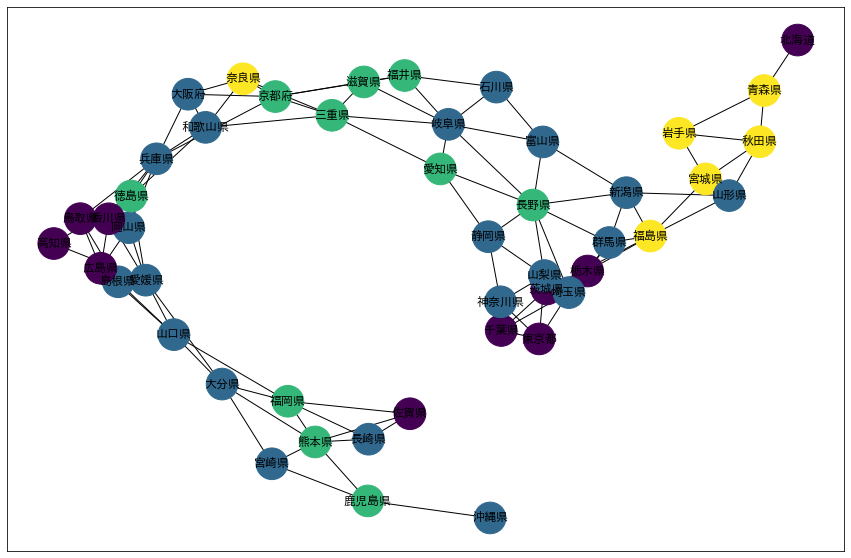

In [40]:
# ラベルごとに色を変えて可視化
plt.figure(figsize=(15,10))
pos=nx.spring_layout(G, k=0.3, seed=67) 
nx.draw_networkx_edges(G, pos, random_state=18)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=list(node_label_dict_sorted.values()), random_state=888)
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', random_state=42)
plt.show()

## Graph Covolutional Networks
- ここでは、Deep Graph Library(https://www.dgl.ai/)というpytorchベースのライブラリを用いる
- documentやtutorialが充実していて、とても良い
- このライブラリは、networkxとの相性が良い


- ここでは、論文の引用ネットワークを例にとる

- dataのインターネット上からのダウンロードは、プロキシで引っかかる
    - https://github.com/dmlc/dgl/issues/689 に記載のように、download関数の引数をfrom verify_ssl=True to verify_ssl=Falseに変える

### GCN

In [41]:
import dgl
import dgl.function as fn
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph

In [42]:
device = 'quda' if torch.cuda.is_available() else 'cpu'
print(device)

quda


In [43]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything()

In [44]:
# cora datasetの読み込み
from dgl.data import citation_graph as citegrh
data = citegrh.load_cora()

In [45]:
data.graph # networkxのグラフが格納

In [46]:
print('# of nodes', data.graph.number_of_nodes())
print('# of edges', data.graph.number_of_edges())

# of nodes 2708
# of edges 10556


In [47]:
# 論文に含まれるBag_of_Words特徴量が格納
print(data.features.shape)

(2708, 1433)


In [48]:
print(data.labels.shape)
print(np.unique(data.labels))

(2708,)
[0 1 2 3 4 5 6]


In [49]:
# nx.DiGraphを，DGLGraphに
g = DGLGraph(data.graph)
g

DGLGraph(num_nodes=2708, num_edges=10556,
         ndata_schemes={}
         edata_schemes={})

In [50]:
g.ndata['feature'] = data.features
g.ndata['label'] = data.labels
g

DGLGraph(num_nodes=2708, num_edges=10556,
         ndata_schemes={'feature': Scheme(shape=(1433,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
         edata_schemes={})

In [51]:
gcn_msg = fn.copy_src(src='h', out='m')  # edgeを通して，どのようなメッセージをどう渡すかを決める関数
gcn_reduce = fn.sum(msg='m', out='h')  # 渡されたメッセージをどのように集約するかを決める関数

class NodeApplyModule(nn.Module):
    """
    ノードごとに作用させる関数の定義（集約操作を行った後に作用させるもの）
    　- ここでは，全結合層で，属性情報をin_feats -> out_feat次元に変換
     - そして，活性化関数を作用
    """
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

In [52]:
class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, features):
        g.ndata['h'] = features
        g.update_all(gcn_msg, gcn_reduce)  # Send messages through all edges and update all nodes.
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')  # ndata['h']が削除されるが，返り値としては，ndata['h']となる

In [53]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.gcn1 = GCN(1433, 16, F.relu)
        self.gcn2 = GCN(16, 7, F.relu)

    def forward(self, g, features):
        x = self.gcn1(g, features)
        x = self.gcn2(g, x)
        return x

In [54]:
train_mask = torch.BoolTensor(data.train_mask)
test_mask = torch.BoolTensor(data.test_mask)

In [55]:
def evaluate(model, g, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(g, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [56]:
net = Net()
print(net)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

Net(
  (gcn1): GCN(
    (apply_mod): NodeApplyModule(
      (linear): Linear(in_features=1433, out_features=16, bias=True)
    )
  )
  (gcn2): GCN(
    (apply_mod): NodeApplyModule(
      (linear): Linear(in_features=16, out_features=7, bias=True)
    )
  )
)


In [57]:
for epoch in range(50):
    logits = net(g, g.ndata['feature'])
    loss = criterion(logits[train_mask], g.ndata['label'][train_mask])
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    acc = evaluate(net, g, g.ndata['feature'], g.ndata['label'], test_mask)
    print("Epoch {:05d} | Loss {:.4f} | Test Acc {:.4f}".format(epoch+1, loss.item(), acc))

Epoch 00001 | Loss 1.9453 | Test Acc 0.1920
Epoch 00002 | Loss 1.9276 | Test Acc 0.1930
Epoch 00003 | Loss 1.9119 | Test Acc 0.1990
Epoch 00004 | Loss 1.8962 | Test Acc 0.2000
Epoch 00005 | Loss 1.8799 | Test Acc 0.2100
Epoch 00006 | Loss 1.8635 | Test Acc 0.2500
Epoch 00007 | Loss 1.8467 | Test Acc 0.2810
Epoch 00008 | Loss 1.8294 | Test Acc 0.3080
Epoch 00009 | Loss 1.8124 | Test Acc 0.3180
Epoch 00010 | Loss 1.7948 | Test Acc 0.3300
Epoch 00011 | Loss 1.7771 | Test Acc 0.3410
Epoch 00012 | Loss 1.7590 | Test Acc 0.3490
Epoch 00013 | Loss 1.7404 | Test Acc 0.3630
Epoch 00014 | Loss 1.7218 | Test Acc 0.3760
Epoch 00015 | Loss 1.7038 | Test Acc 0.3950
Epoch 00016 | Loss 1.6859 | Test Acc 0.4130
Epoch 00017 | Loss 1.6685 | Test Acc 0.4330
Epoch 00018 | Loss 1.6505 | Test Acc 0.4490
Epoch 00019 | Loss 1.6326 | Test Acc 0.4660
Epoch 00020 | Loss 1.6146 | Test Acc 0.4870
Epoch 00021 | Loss 1.5972 | Test Acc 0.5040
Epoch 00022 | Loss 1.5804 | Test Acc 0.5150
Epoch 00023 | Loss 1.5638 | Test